In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
dataset_dir = "/runai-ivrl-scratch/students/2021-fall-sp-jellouli/mix6"

In [3]:
import os, sys
sys.path.append(os.path.normpath(os.path.join(os.getcwd(), '..')))
import matplotlib.pyplot as plt

from src.utils.img_utils import read_image

NameError: name 'Compose' is not defined

In [ ]:
os.path.isdir(dataset_dir)

In [ ]:
%env MIX6_DATASETS=/runai-ivrl-scratch/students/2021-fall-sp-jellouli/mix6

### BlendedMVS (bgr)

In [ ]:
from src.datasets import BlendedMVS

In [94]:
b_mvs = BlendedMVS()

In [95]:
img, disp = b_mvs[0]

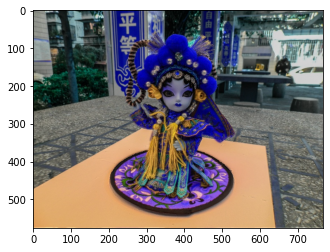

In [96]:
plt.imshow(img)

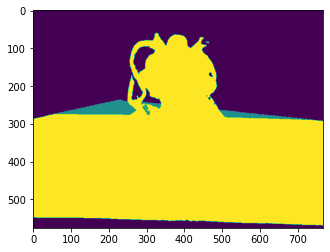

In [13]:
plt.imshow(disp)

In [30]:
data = iter(b_mvs)

In [31]:
img, disp = next(data)

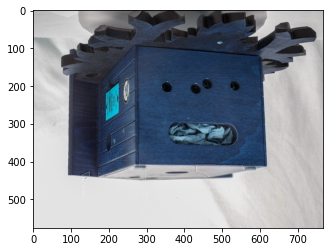

In [33]:
plt.imshow(img[:, :, ::1])

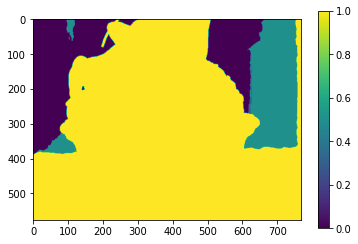

In [30]:
plt.imshow(disp)
plt.colorbar()

### ApolloScape (bgr)

In [49]:
from src.datasets import ApolloScape

In [25]:
dataset = ApolloScape()

In [26]:
img, disp = dataset[0]

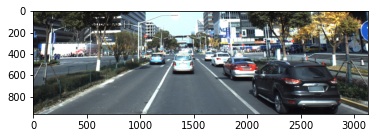

In [27]:
plt.imshow(img[:, :, ::-1])

In [22]:
import matplotlib.pyplot as plt

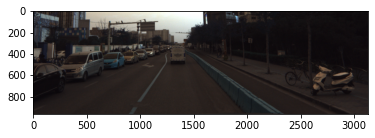

In [23]:
plt.imshow(img)

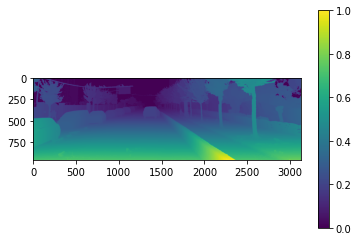

In [24]:
plt.imshow(disp)
plt.colorbar()

### HRWSI (bgr)

In [51]:
from src.datasets import HRWSI

In [29]:
dataset = HRWSI()

In [30]:
img, disp = dataset[0]

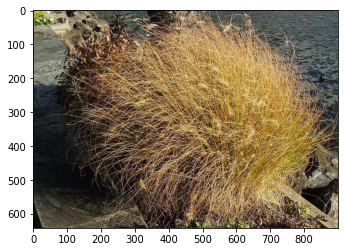

In [31]:
plt.imshow(img[:,:,::-1])

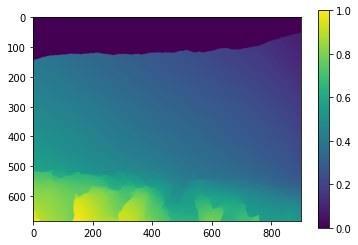

In [36]:
plt.imshow(disp)
plt.colorbar()

### RedWeb (bgr)

In [52]:
from src.datasets import RedWeb

In [40]:
dataset = RedWeb()

In [50]:
img, disp = dataset[3]

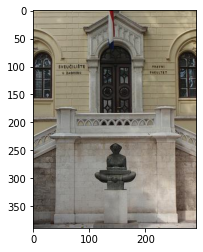

In [51]:
plt.imshow(img[:, :, ::-1])

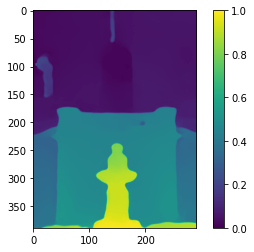

In [52]:
plt.imshow(disp)
plt.colorbar()

### MegaDepth (bgr)

In [82]:
from src.datasets import MegaDepth

In [83]:
dataset = MegaDepth()

In [87]:
img, disp = dataset[1]

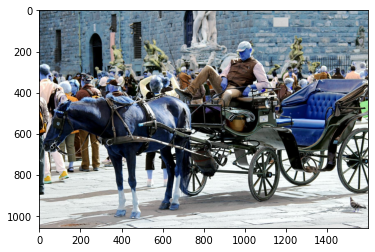

In [88]:
plt.imshow(img)

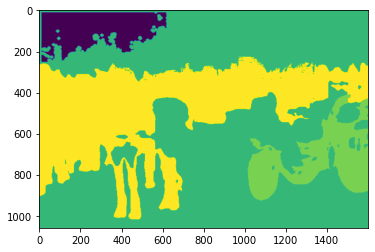

In [89]:
plt.imshow(disp)

### TartanAir (bgr)

In [121]:
from src.datasets import TartanAir

In [122]:
dataset = TartanAir()

In [123]:
len(dataset)

151152

In [124]:
p = "/runai-ivrl-scratch/students/2021-fall-sp-jellouli/mix6/TartanAir/abandonedfactory/Easy/depth_left/P000/depth_left/000151_left_depth.npy"

In [125]:
import numpy as np

In [126]:
a = np.load(p)

In [127]:
a.shape

(480, 640)

In [128]:
img, disp = dataset[1]

In [129]:
import matplotlib.pyplot as plt

In [130]:
img.shape

(480, 640, 3)

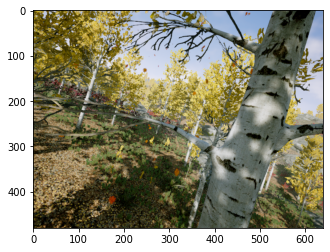

In [39]:
plt.imshow(img[:,:,::-1])

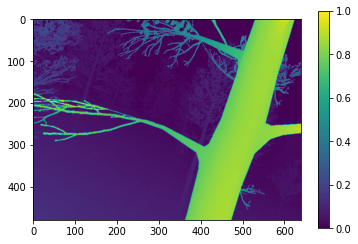

In [40]:
plt.imshow(disp)
plt.colorbar()

## Data loading

In [8]:
from torch.utils.data import DataLoader
from src.datasets import *
from src.utils.data_utils import resize_collate

ModuleNotFoundError: No module named 'midas'

In [ ]:
hrwsi = HRWSI()

In [133]:
img, sample = hrwsi[0]

In [76]:
img.shape

(642, 900, 3)

In [77]:
import cv2

In [82]:
cv2.resize(img, (600, 900)).shape

(900, 600, 3)

In [99]:
loader = DataLoader(hrwsi, batch_size=8, collate_fn=lambda x: x)

In [100]:
loader_iter = iter(loader)

In [102]:
samples = next(loader_iter)

In [103]:
len(samples)

8

In [104]:
img, disp = zip(*samples)

In [107]:
[i.shape for i in img]

[(650, 900, 3),
 (660, 900, 3),
 (648, 900, 3),
 (655, 900, 3),
 (650, 900, 3),
 (664, 900, 3),
 (653, 900, 3),
 (657, 900, 3)]

In [108]:
[d.shape for d in disp]

[(650, 900),
 (660, 900),
 (648, 900),
 (655, 900),
 (650, 900),
 (664, 900),
 (653, 900),
 (657, 900)]

In [9]:
from hubconf import transforms

ModuleNotFoundError: No module named 'hubconf'

In [114]:
sys.path.append(os.path.normpath(os.path.join(os.getcwd(), '..', 'external', 'MiDaS')))

In [134]:
from midas.transforms import *

In [138]:
from torchvision.transforms import Compose
import torch

In [144]:
transform = Compose(
        [
            lambda s: {"image": s[0] / 255.0, "disparity": s[1]},
            Resize(
                384,
                384,
                resize_target=True,
                keep_aspect_ratio=True,
                ensure_multiple_of=32,
                resize_method="upper_bound",
                image_interpolation_method=cv2.INTER_CUBIC,
            ),
            NormalizeImage(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
            PrepareForNet(),
            lambda sample: (torch.from_numpy(sample["image"]).unsqueeze(0), torch.from_numpy(sample["disparity"]).unsqueeze(0)) 
        ]
    )

In [147]:
i, d = transform(hrwsi[0])

In [148]:
i.shape

torch.Size([1, 3, 288, 384])

In [149]:
d.shape

torch.Size([1, 288, 384])